In [38]:
from __future__ import division
import scipy.stats as sp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
men_size = 40
women_size = 30

In [72]:
men_dist = sp.norm(loc=75, scale=7.5)
women_dist = sp.norm(loc=70, scale=7.5)

In [73]:
men_data = men_dist.rvs(men_size)
women_data = women_dist.rvs(women_size)

In [74]:
all_data = np.concatenate((men_data, women_data))

In [75]:
split_var = np.var(men_data) + np.var(women_data) 
total_var = np.var(all_data)
test_stat = split_var/total_var

### resampling sampling distribution

In [76]:
test_stat_null_array = []

for _ in range(1000):
    
    #draw null hypothesis samples
    null_one = np.random.choice(all_data, size=men_size)
    null_two = np.random.choice(all_data, size=women_size)
    null_all = np.concatenate((null_one, null_two))
    
    #calculate test stat
    split_var_null = np.var(null_one) + np.var(null_two)
    total_var_null = np.var(null_all)
    test_stat_null = split_var_null/total_var_null
    
    test_stat_null_array.append(test_stat_null)

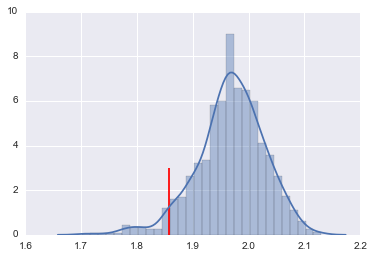

In [77]:
ax = sns.distplot(test_stat_null_array)
ax.vlines(test_stat, 0, 3, 'red')

In [78]:
np.where(test_stat_null_array <= test_stat)[0].size/len(test_stat_null_array)

0.045